<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/Pytorch_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.arange(16).reshape((4,4))
print(f"X = {X} \n")
print(f"Shape = {X.shape} \n")
print(f"add 5 = {X+5} \n")
print(f"X^T.X = {np.dot(X.T,X)} \n")
print(f"mean over cols = {X.mean(axis=0)}")
print(f"mean over rows = {X.mean(axis=-1)}")
print(f"cumsum of rows = {X.cumsum(axis=-1)}")

X = [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

Shape = (4, 4) 

add 5 = [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]] 

X^T.X = [[224 248 272 296]
 [248 276 304 332]
 [272 304 336 368]
 [296 332 368 404]] 

mean over cols = [6. 7. 8. 9.]
mean over rows = [ 1.5  5.5  9.5 13.5]
cumsum of rows = [[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]
 [12 25 39 54]]


In [3]:
x = np.arange(16).reshape(4,4)
x = torch.tensor(x,dtype=torch.float32)
print(f"x = {x} \n")
print(f'shape = {x.shape} \n')
print(f'add 5 = {x+5} \n')
print(f'X^T * X = {torch.matmul(x.transpose(1,0),x)}')

x = tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]]) 

shape = torch.Size([4, 4]) 

add 5 = tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]]) 

X^T * X = tensor([[224., 248., 272., 296.],
        [248., 276., 304., 332.],
        [272., 304., 336., 368.],
        [296., 332., 368., 404.]])


In [9]:
X.sum(axis=-1)

array([ 6, 22, 38, 54])

In [12]:
x.sum(dim=-1)

tensor([ 6., 22., 38., 54.])

In [13]:
X.astype('int64')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [14]:
x.type(torch.LongTensor)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

# Linear Regression on (Boston Housing Prices)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
url = 'http://lib.stat.cmu.edu/datasets/boston'
df = pd.read_csv(url,sep='\s+',skiprows=22,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [72]:
data = np.hstack([df.values[::2,:],df.values[1::2,:2]])
target = df.values[1::2,2]

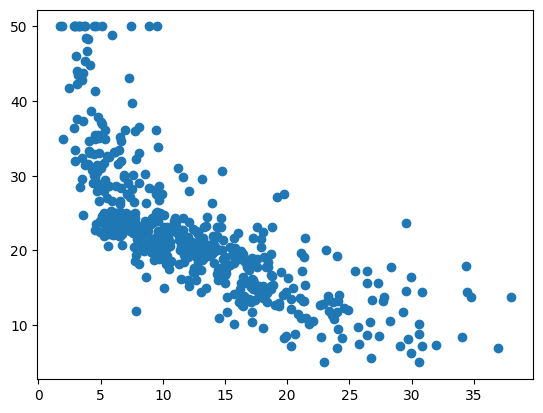

In [73]:
plt.scatter(data[:,-1],target)

In [50]:
w = torch.zeros(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [52]:
x = torch.tensor(data[:,-1]/10,dtype=torch.float32)
y = torch.tensor(target,dtype=torch.float32)

In [54]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)
loss.backward()

In [55]:
print(f'dL/dw = {w.grad}')
print(f'dL/db = {b.grad}')

dL/dw = tensor([-47.3514])
dL/db = tensor([-45.0656])


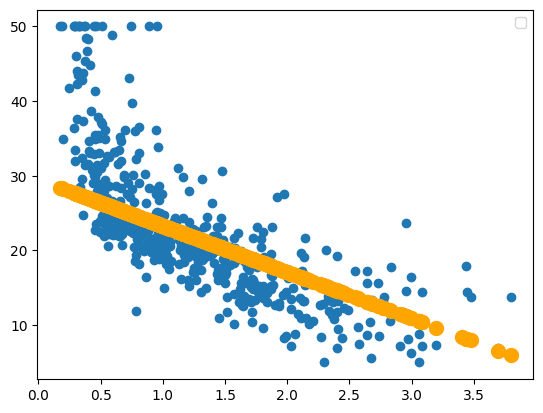

loss = 44.81556701660156


In [88]:
from IPython.display import clear_output


w = torch.zeros(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)

x = torch.tensor(data[:,-1]/10,dtype=torch.float32)
y = torch.tensor(target,dtype=torch.float32)

for i in range(100):
  y_pred = w * x + b
  loss = torch.mean((y_pred - y) ** 2)
  loss.backward()

  w.data -= 0.05 * w.grad.data
  b.data -= 0.05 * b.grad.data

  w.grad.data.zero_()
  b.grad.data.zero_()
  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.scatter(x.data.numpy(),y_pred.data.numpy(),color = 'orange',linewidth=5)
    plt.legend()
    plt.show()

    print(f'loss = {loss.data.numpy()}')
    if loss.data.numpy() < 0.5:
      print("Done")
      break